# El Análisis Exploratorio de Datos

El Análisis Exploratorio de Datos (Exploratory Data Analysis - EDA) es una fase crucial en el proceso de análisis de datos que se centra en comprender la naturaleza de los datos antes de aplicar técnicas más avanzadas. A continuación, te presento una introducción sobre el Análisis Exploratorio de Datos:

### Introducción al Análisis Exploratorio de Datos (EDA):

1. **Exploración inicial**:
   - El EDA implica examinar y comprender los datos mediante técnicas visuales y estadísticas para identificar patrones, tendencias, anomalías y relaciones que pueden ser relevantes para el análisis posterior.

2. **Objetivos del EDA**:
   - Ayuda a resumir las características principales de los datos, detectar valores atípicos, evaluar la distribución de los datos, analizar la correlación entre variables y formular hipótesis iniciales.

3. **Herramientas y técnicas**:
   - Durante el EDA se utilizan diversas herramientas como gráficos (histogramas, diagramas de dispersión, boxplots), estadísticas descriptivas, análisis de correlación y técnicas de visualización para explorar y entender los datos.

4. **Limpieza y preparación**:
   - En esta etapa, es común identificar y corregir problemas en los datos como valores faltantes, errores, datos atípicos, inconsistencias, entre otros, para garantizar la calidad de los datos antes de proceder con el análisis.

5. **Iterativo y no lineal**:
   - El EDA no sigue un proceso estrictamente lineal y puede ser un ciclo iterativo en el que se van refinando las preguntas y descubrimientos a medida que se exploran más a fondo los datos.

### Importancia del Análisis Exploratorio de Datos:

- **Revela información oculta**:
  - El EDA revela información valiosa que puede no ser evidente a simple vista, lo que ayuda a comprender mejor los datos y a formular preguntas más específicas.

- **Validación de supuestos**:
  - Permite validar suposiciones iniciales, identificar problemas en los datos y ajustar el enfoque del análisis en función de los hallazgos.

- **Toma de decisiones informadas**:
  - Proporciona una base sólida para la toma de decisiones informadas al proporcionar una comprensión profunda de los datos y sus implicaciones.

En resumen, el Análisis Exploratorio de Datos es una fase esencial en el proceso de análisis de datos que ayuda a comprender la estructura, características y patrones de los datos, y a prepararlos adecuadamente para análisis más avanzados. Es un punto de partida crucial para extraer información significativa y construir modelos predictivos precisos a partir de los datos disponibles.


# Importamos librerias

In [0]:
import os
import sys
import requests
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import desc, col, size, udf, countDistinct, round, count
from pyspark.sql.types import *

# Creamos el SparkSession

In [0]:
MAX_MEMORY = "3G"

conf = pyspark.SparkConf().setMaster("local[*]") \
        .set("spark.executor.heartbeatInterval", 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)

def init_spark():
    return SparkSession \
            .builder \
            .appName("Indian Restaurants EDA Pyspark") \
            .config(conf=conf) \
            .getOrCreate()


spark = init_spark()
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

# Cargamos los datos

In [0]:
schema = StructType([
    StructField("Name", StringType()),
    StructField("Location", StringType()),
    StructField("Locality", StringType()),
    StructField("City", StringType()),
    StructField("Cuisine", StringType()),
    StructField("Rating", FloatType()),
    StructField("Votes", IntegerType()),
    StructField("Cost", IntegerType()),
])

In [0]:
df_url = "https://raw.githubusercontent.com/narencastellon/databricks_pyspark/refs/heads/main/data/restaurants.csv"

In [0]:
# Download the CSV file using requests
response = requests.get(df_url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the CSV data into a Pandas DataFrame
restaurante = pd.read_csv(io.StringIO(response.text), sep=',')

# Convert the Pandas DataFrame to a Spark DataFrame
df = spark.createDataFrame(restaurante)

df.show()

+--------------------+--------------------+--------------+-----+--------------------+------+-----+----+
|                Name|            Location|      Locality| City|             Cuisine|Rating|Votes|Cost|
+--------------------+--------------------+--------------+-----+--------------------+------+-----+----+
|               Local|Scindia House,Con...| Central Delhi|Delhi|North Indian,  Fi...|   4.1| 2415|2000|
|       The G.T. ROAD|M-Block,Connaught...| Central Delhi|Delhi|        North Indian|   4.3| 2363|1500|
|             Tamasha|Connaught Place, ...| Central Delhi|Delhi|Finger Food,  Nor...|   4.2| 5016|2000|
|   The Junkyard Cafe|Connaught Place, ...| Central Delhi|Delhi|North Indian,  Me...|   4.2| 2821|1800|
|Chili's American ...|M-Block,Connaught...| Central Delhi|Delhi|Mexican,  America...|   4.4| 1094|2000|
|Ardor 2.1 Restaur...|Connaught Place, ...| Central Delhi|Delhi|Multi-Cuisine,  N...|   3.9| 1391|2000|
|The Luggage Room ...|M-Block,Connaught...| Central Delhi|Delhi|

In [0]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Locality: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Cuisine: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Votes: long (nullable = true)
 |-- Cost: long (nullable = true)



In [0]:
df.limit(3).toPandas()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000


# Revisando si tenemos Missing Values

In [0]:
str_col = ["Name", "Location", "Locality", "City", "Cuisine"]
num_col = ["Votes", "Cost"]
missing_values = {}

for column in df.columns :
    if column in str_col :
        missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
        # eqNullSafe(): Equality test that is safe for null values.
        missing_values.update({column:missing_count})
        
    if column in num_col :
        missing_count = df.filter(col(column).isin([np.nan]) | col(column).isNull()).count()
        missing_values.update({column:missing_count})
        
missing_df = pd.DataFrame.from_dict([missing_values])
missing_df

,Name,Location,Locality,City,Cuisine,Votes,Cost
0,0,0,0,0,0,0,0


### Creando Función de Utilidad

In [0]:
def plot_bar(data, labels, xlabel, title):
    fig = plt.figure(figsize=[18,8])
    ax = fig.gca()
    colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
    plt.barh(labels, data, color=colors)
    plt.xlabel(xlabel)
    for i, v in enumerate(data):
        ax.text(v+0.5, i, str(v), color='#424242')
    plt.title(title)
    plt.show()    

In [0]:
def plot_pie(data, labels, legend_title, title):
    fig = plt.figure(figsize=(18,6))
    ax = fig.gca()
    # Creating autocpt arguments
    def func(pct):
        return "{:.1f}%".format(pct)

    colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
    wedges, texts, autotexts = ax.pie(x=data, autopct=lambda pct : func(pct))

    ax.legend(wedges, labels,
              title = legend_title,
              loc ="center left",
              bbox_to_anchor =(1.2, 0, 0.5, 1))
    plt.setp(autotexts, size = 8, weight ="normal")
    plt.title(title)
    plt.show()    

# Analisis Exploratorio de Datos

#### Los 5 restaurantes más caros

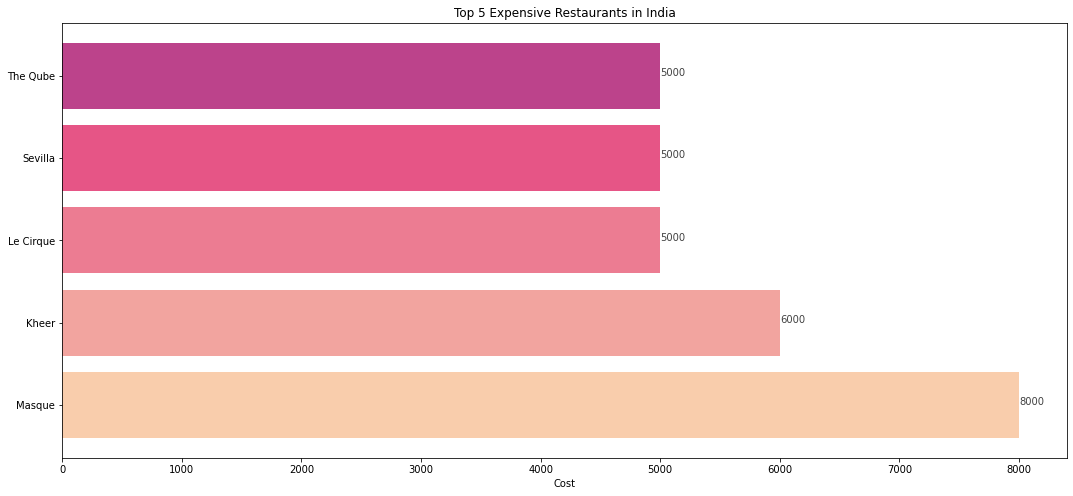

In [0]:
top_expensive_restro = df.sort(col("Cost").desc()).limit(5).toPandas()
plot_bar(top_expensive_restro.Cost.values, top_expensive_restro.Name.values, "Cost", "Top 5 Expensive Restaurants in India")

#### Restaurantes con máxima calificación y popularidad por ciudad

In [0]:
city_list = [city[0] for city in df.dropDuplicates(["City"]).select("City").toPandas().values.tolist()]
for i, city in enumerate(city_list) :
    if i % 12 == 0 : print()
    print(city, end=",\t")


Noida,	Gurgaon,	Delhi,	Ghaziabad,	Mumbai,	Bangalore,	Chennai,	Hyderabad,	Pune,	Ahmedabad,	Kolkata,	Goa,	
Chandigarh,	Jaipur,	Udaipur,	Kochi,	Vadodara,	Lucknow,	Ludhiana,	Surat,	Agra,	Nagpur,	Indore,	

In [0]:
city_input = "Mumbai"

In [0]:
popular_restro = df.filter(col("City") == city_input).sort(col("Votes").desc()).limit(10).toPandas()

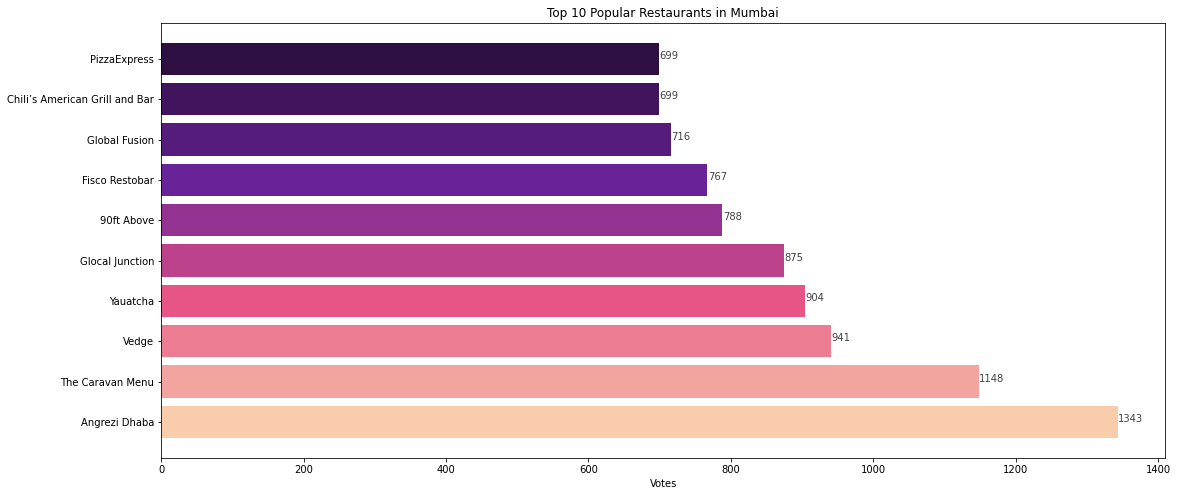

In [0]:
plot_bar(popular_restro.Votes.values, popular_restro.Name.values, "Votes", "Top 10 Popular Restaurants in "+city_input)

In [0]:
threshold_votes = 20
rating_restro = df.filter(col("City") == city_input).filter(col("Votes")>threshold_votes)\
    .sort(col("Rating").desc(), desc(col("Votes"))).limit(10).toPandas()

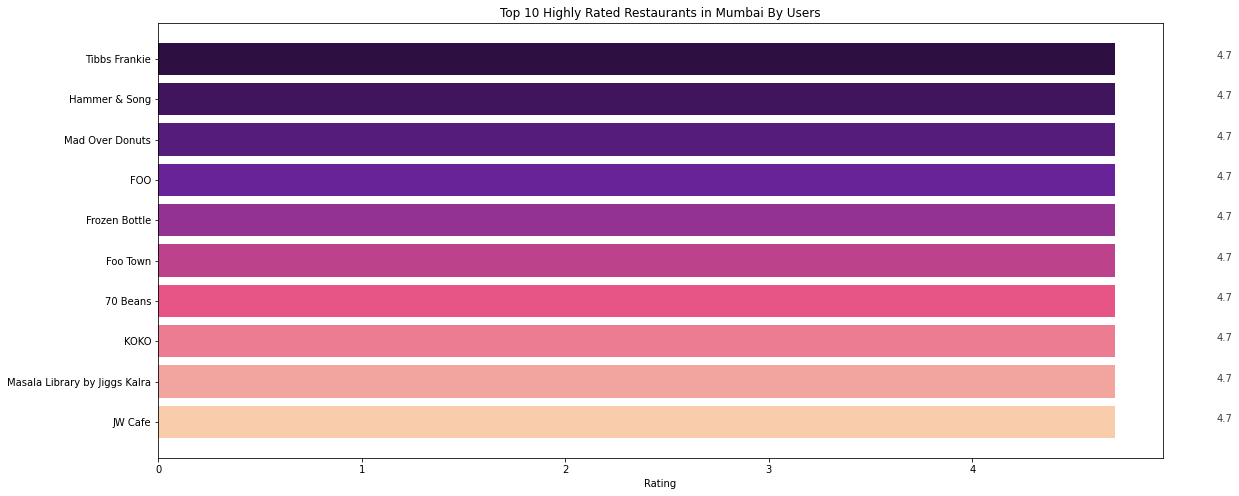

In [0]:
plot_bar(rating_restro.Rating.values, rating_restro.Name.values, "Rating", "Top 10 Highly Rated Restaurants in "+city_input+" By Users")

#### Relación entre el costo promedio y la calificación

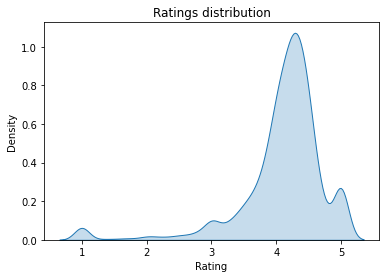

In [0]:
sns.kdeplot(df.toPandas()["Rating"], fill=True)
plt.title("Ratings distribution")
plt.show()

En promedio, la mayoría de los restaurantes tienen una calificación entre 3,5 y 4,5.

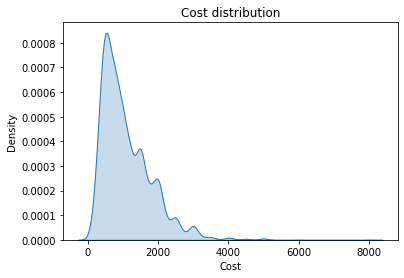

In [0]:
sns.kdeplot(df.toPandas()["Cost"], fill=True)
plt.title("Cost distribution")
plt.show()

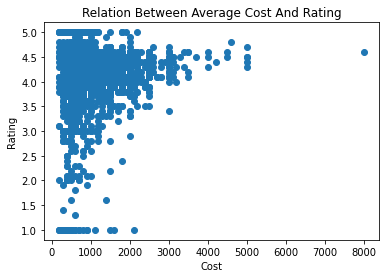

In [0]:
plt.plot("Cost", "Rating", data=df.toPandas().sample(2000), linestyle="none", marker="o")
plt.xlabel("Cost")
plt.ylabel("Rating")
plt.title("Relation Between Average Cost And Rating")
plt.show()

In [0]:
def price_range_round(val):    
    if val <= 1000 :
        return 1
    elif 1000 < val <= 2000 :
        return 2
    elif 2000 < val <= 3000 :
        return 3
    elif 3000 < val <= 4000 :
        return 4
    elif 4000 < val <= 5000 :
        return 5
    elif 5000 < val <= 6000 :
        return 6
    elif 6000 < val <= 7000 :
        return 7
    elif 7000 < val <= 8000 :
        return 8    

udf_price_range = udf(lambda val : price_range_round(val))
df = df.withColumn("price_range",udf_price_range("Cost"))
df.toPandas().head(3)

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost,price_range
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000,2
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500,2
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,2


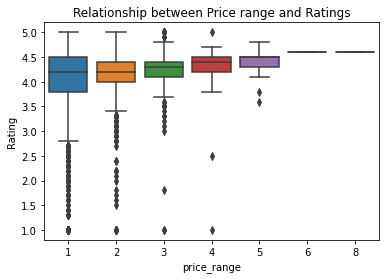

In [0]:
sns.boxplot(x="price_range", y="Rating", data=df.toPandas().sort_values(by=["price_range"]))
plt.title("Relationship between Price range and Ratings")
plt.show()

Esto concluye que a medida que aumenta el costo promedio, existe una alta probabilidad de que el restaurante tenga una alta calificación.


#### Restaurantes con el máximo número de puntos de venta

In [0]:
top_outlets = df.groupBy(col("Name")).agg(count(col("Name")).alias("name_count"))\
    .filter(col("name_count")>1).sort(desc(col("name_count"))).limit(10).toPandas()
top_outlets.head(3)

,Name,name_count
0,Wow! Momo,67
1,Kanti Sweets,65
2,Barbeque Nation,48


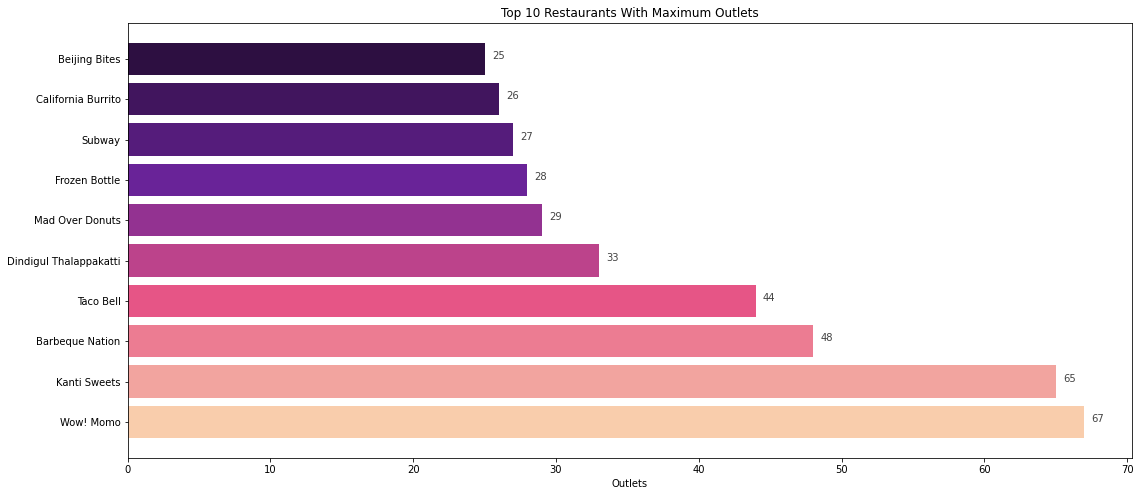

In [0]:
plot_bar(top_outlets.name_count.values, top_outlets.Name.values, "Outlets", "Top 10 Restaurants With Maximum Outlets")

In [0]:
outlet_input = "Mad Over Donuts"

In [0]:
outlet_destri_cities = df.filter(col("Name")==outlet_input).groupBy(col("City")).agg(count(col("City")).alias("city_count")).toPandas()
outlet_destri_cities.head()

,City,city_count
0,Delhi,4
1,Mumbai,23
2,Bangalore,2


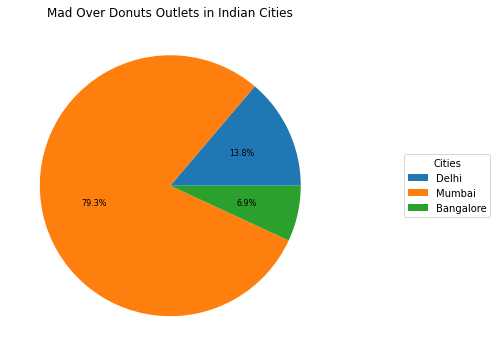

In [0]:
plot_pie(outlet_destri_cities.city_count.values.tolist(), outlet_destri_cities.City.values.tolist(), "Cities", outlet_input+" Outlets in Indian Cities")

In [0]:
outlet_destri_locality = df.filter(col("City")==city_input).filter(col("Name")==outlet_input).groupBy(col("locality"))\
    .agg(count(col("locality")).alias("locality_count")).toPandas()
outlet_destri_locality.head(3)

,locality,locality_count
0,Central Suburbs,4
1,Powai,1
2,Navi Mumbai,3


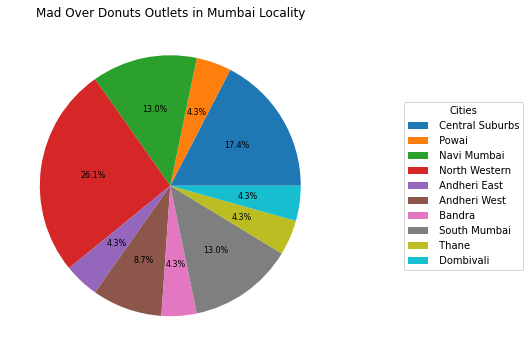

In [0]:
plot_pie(outlet_destri_locality.locality_count.values.tolist(), outlet_destri_locality.locality.values.tolist(), "Cities", \
            outlet_input+" Outlets in "+city_input+" Locality")

#### Cocinas populares por ciudad

In [0]:
cuisines = []
def format_cuisine(line):
    cuisine_list = line.split(",")
    for cuisine in cuisine_list :
        cuisine = cuisine.strip()
        if cuisine not in cuisines : cuisines.append(cuisine)
            
for line in df.select("Cuisine").collect():
    format_cuisine(line.Cuisine)

In [0]:
cuisines_count = {cuisine:0 for cuisine in cuisines }
df_cuisines_list = df.filter(col("City")==city_input).select("Cuisine").rdd.flatMap(lambda x : x).collect()

In [0]:
for row in df_cuisines_list :
    cuisine_list = row.split(", ")
    for cuisine in cuisine_list :
        if cuisine == "Multi-Cuisine" : continue
        cuisine = cuisine.strip()  
        cuisines_count[cuisine] += 1 
        
cuisines_count = dict(sorted(cuisines_count.items(), key= lambda x: x[1], reverse=True))
for i, (key, val) in enumerate(cuisines_count.items()):
    print(key, val)
    if i == 4 : break

North Indian 335
Chinese 280
Fast Food 197
Continental 181
Italian 178


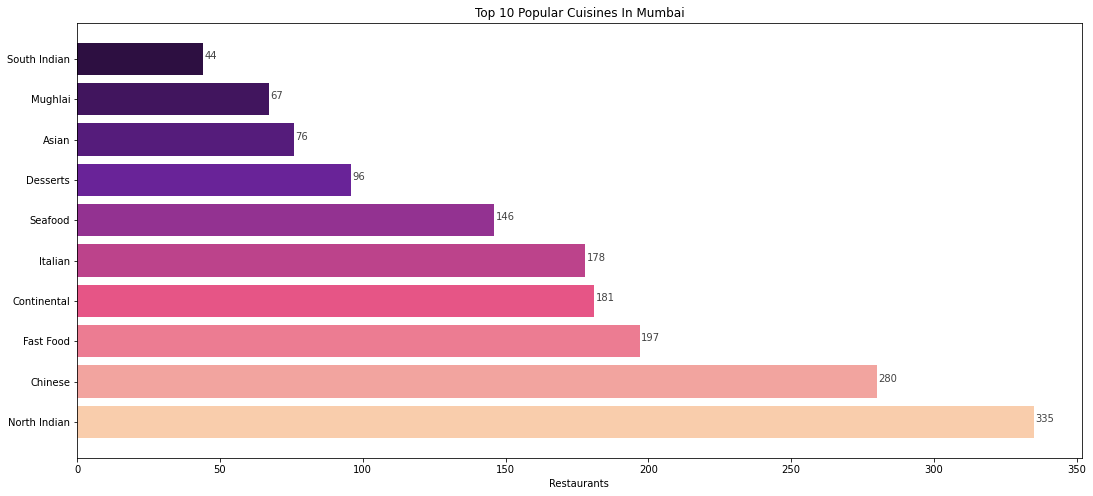

In [0]:
plot_bar(list(cuisines_count.values())[:10], list(cuisines_count.keys())[:10], "Restaurants", "Top 10 Popular Cuisines In "+city_input)

#### Restaurantes populares con una cocina particular

In [0]:
for i, cuisine in enumerate(cuisines) :
    if i % 12 == 0 : print()
    print(cuisine, end=",\t")


North Indian,	Finger Food,	Continental,	Italian,	Asian,	Mediterranean,	Oriental,	Mexican,	American,	Multi-Cuisine,	Chinese,	Seafood,	
Rajasthani,	Fusion,	South Indian,	Mughlai,	Modern Indian,	Japanese,	World Cuisine,	Fast Food,	European,	Tex Mex,	Thai,	Korean,	
Barbecue,	Andhra,	Biryani,	Street Food,	Coffee,	Hyderabadi,	Tea,	Gujarati,	Desserts,	Ice Cream,	Shakes,	Bakery and Confectionary,	
Pizza,	Sushi,	Indian Cuisine,	Sizzlers,	Spanish,	Waffle,	Lebanese,	Kerala,	Goan,	Kashmiri,	French,	Tibetan,	
Health Food,	Indonesian,	Mithai,	South American,	Arabian,	Deli,	Middle Eastern,	Doughnuts,	Burger,	Nepalese,	Malaysian,	North Eastern,	
Naga,	Turkish,	Juice,	Bengali,	Bihari,	Chettinad,	Singaporean,	Iranian,	Vietnamese,	Lucknowi,	African,	Portuguese,	
Greek,	Moroccan,	Mangalorean,	Coastal,	Awadhi,	Malvani,	British,	Maharashtrian,	Parsi,	Burmese,	Assamese,	Cantonese,	
Sindhi,	Drinks,	Yogurt,	Konkani,	Chaat,	Persian,	Pakistani,	Contemporary Continental,	Afghani,	Western,	North West Frontier,	Ge

In [0]:
cuisine_input = "North Indian"

In [0]:
popular_cuisines = df.filter(col("City") == city_input).filter(df.Cuisine.contains(cuisine_input)).sort(desc(col("Votes")), desc(col("Rating")))
top = popular_cuisines.count() if popular_cuisines.count() < 10 else 10
top_popular_cuisines = popular_cuisines.limit(top).toPandas()

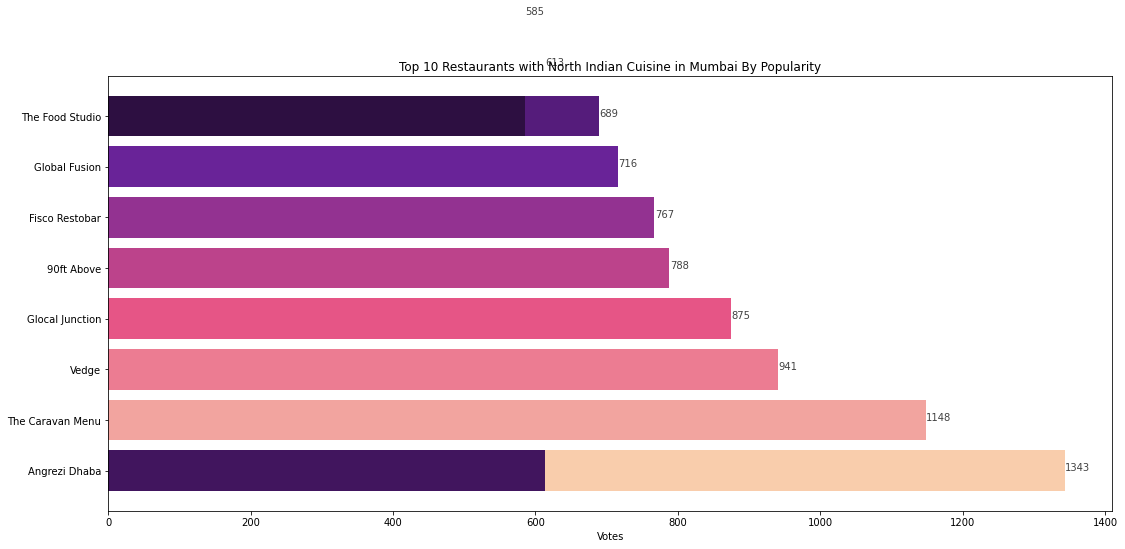

In [0]:
plot_bar(top_popular_cuisines.Votes.values, top_popular_cuisines.Name.values, "Votes", \
            "Top "+str(top)+" Restaurants with "+cuisine_input+" Cuisine in "+city_input+" By Popularity")

In [0]:
threshold_votes = 20
rating_cuisines = df.filter(col("City") == city_input).filter(col("Votes")>threshold_votes)\
    .filter(df.Cuisine.contains(cuisine_input)).sort(desc(col("Rating")), desc(col("Votes")))
top = rating_cuisines.count() if rating_cuisines.count() < 10 else 10
top_rating_cuisines = rating_cuisines.limit(top).toPandas()

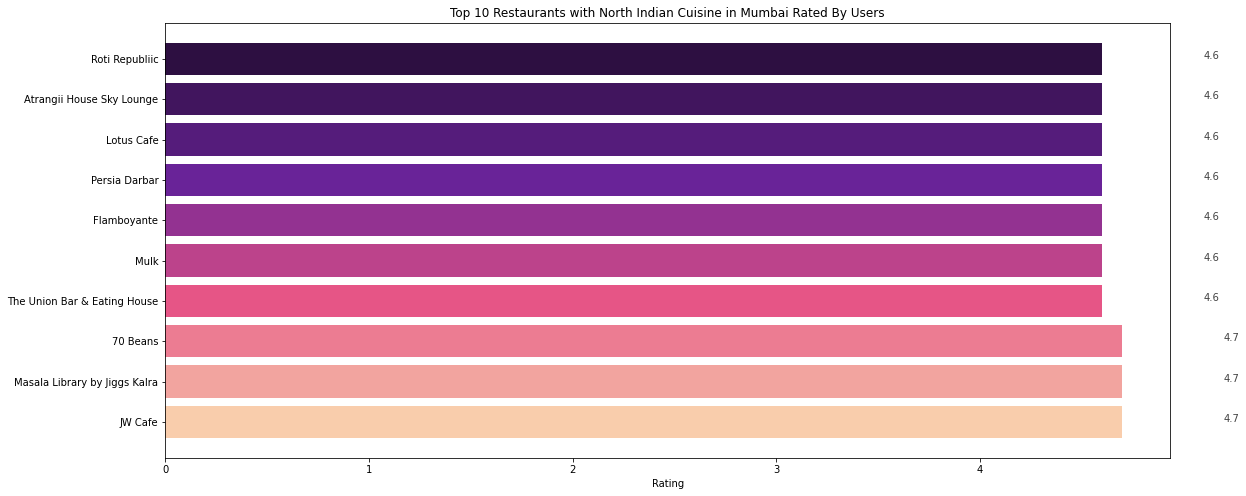

In [0]:
plot_bar(top_rating_cuisines.Rating.values, top_rating_cuisines.Name.values, "Rating", \
         "Top "+str(top)+" Restaurants with "+cuisine_input+" Cuisine in "+city_input+" Rated By Users")

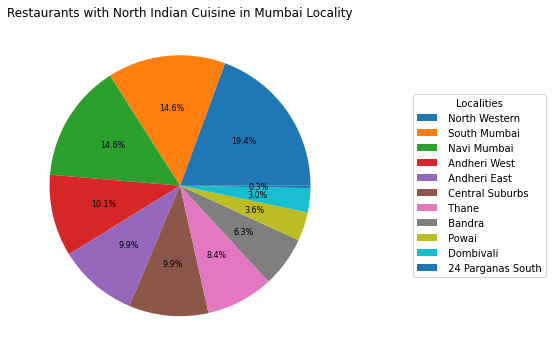

In [0]:
plot_pie(popular_cuisines.toPandas().Locality.value_counts().values.tolist(), popular_cuisines.toPandas().Locality.value_counts().index.tolist(),\
        "Localities", "Restaurants with "+cuisine_input+" Cuisine in "+city_input+" Locality")